#                                                 __Algorithmics__

**EX 1**

Let’s check out the Master theorem. Give an example of a function for each of the three cases of the theorem.

Solve those given recurrences using Master theorem (write down a, b, log_b(a). f(n)), and show how you decided which case the function is. Make sure to check the regularity condition if needed!

Plot your chosen functions, you can write a basic program as done previously, e.g. define a function to calculate T(n) = a T(n/b) + f(n). You can assume again as in the previous week that T(1) is 1.

 - Solution: Firstly, let's write the Master Theorem :
                                             T(n) = a * T(n/b) + f(n) 
                                             a >= 1
                                             b > 1
                                             f(n) = Theta(n^k * log^p(n)
                                             
 First function is **T(n) = 4T(n/2) + n**
 Here a = 4, b = 2 and logb(a) = log2(4) = 2
                       f(n) = Theta(n) ==> k = 1, p = 0 then logb(a) > k. This is case1: Theta(n^logb(a)) = Theta(n^2)
                       
 Second function is **T(n) = 4T(n/2) + n^2**
  Here a = 4, b = 2 and logb(a) = log2(4) = 2
                       f(n) = Theta(n^2) ==> k = 2, p = 0 then logb(a) = k. This is case2: 
                                                                           Theta(n^k * log^p+1(n)) = Theta(n^2 * logn)
                                                                           
                       
 Third function is **T(n) = 2T(n/2) + n^2 * log ^ 2(n)**  
  Here a = 2, b = 2 and logb(a) = log2(2) = 1
                       f(n) = Theta(n^2 * log ^ 2(n)) ==> k = 2, p = 2 then logb(a) < k. This is case3: 
                                                                               Theta(n^k * log^p(n)) = Theta(n^2 * log^2(n))
                                                                               

 While doing this homework I used this source https://www.youtube.com/watch?v=OynWkEj0S-s&t=49s                   

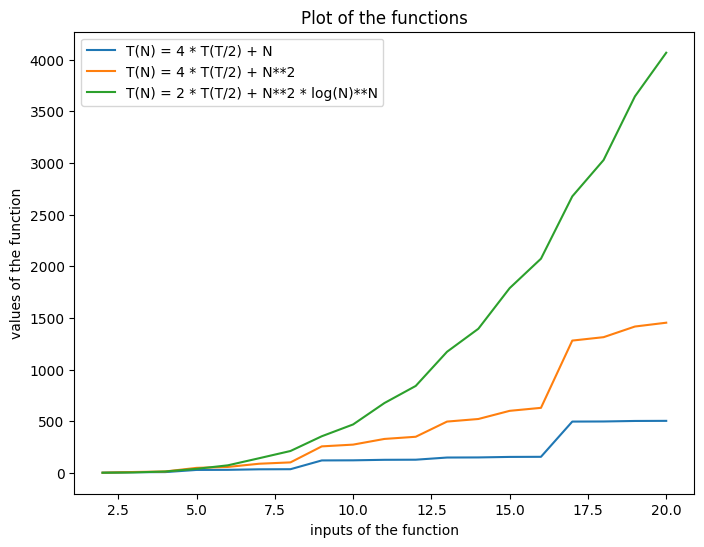

In [105]:
import matplotlib.pyplot as plt
import numpy as np

N = [i for i in range(2, 21)]
T = [0, 1]
T1 = [0, 1]
T2 = [0, 1]

for i in N:
    T.append((4 * T[(i//2)] + i))
    
for i in N:
    T1.append((4 * T1[(i//2)] + i**2))
    
for i in N:
    T2.append((2 * T2[(i//2)] + (i**2) * (np.log(i)**2)))
    
T.remove(0)
T.pop()

T1.remove(0)
T1.pop()
              
T2.remove(0)
T2.pop()

plt.figure(figsize=(8, 6), dpi=100)
plt.plot(N, T)
plt.plot(N, T1)
plt.plot(N, T2)
plt.xlabel('inputs of the function')
plt.ylabel("values of the function")
plt.legend(["T(N) = 4 * T(T/2) + N", "T(N) = 4 * T(T/2) + N**2", "T(N) = 2 * T(T/2) + N**2 * log(N)**N"])
plt.title("Plot of the functions")
plt.show()

**EX 2**

Sometimes the recurrent function is not so simple. Consider function T(n) = T(n/2) + n(sin(n - pi/2) + 2), pi = 3.141592…. (sin(x) takes radians as input).

Can the Master theorem be applied here? If not, then why?

Try to plot the function and try to provide some upper and lower bounds for its asymptotic complexity, feel free to use any of the methods available for you (e.g. plotting, proofs, ...).

 - Solution: 
 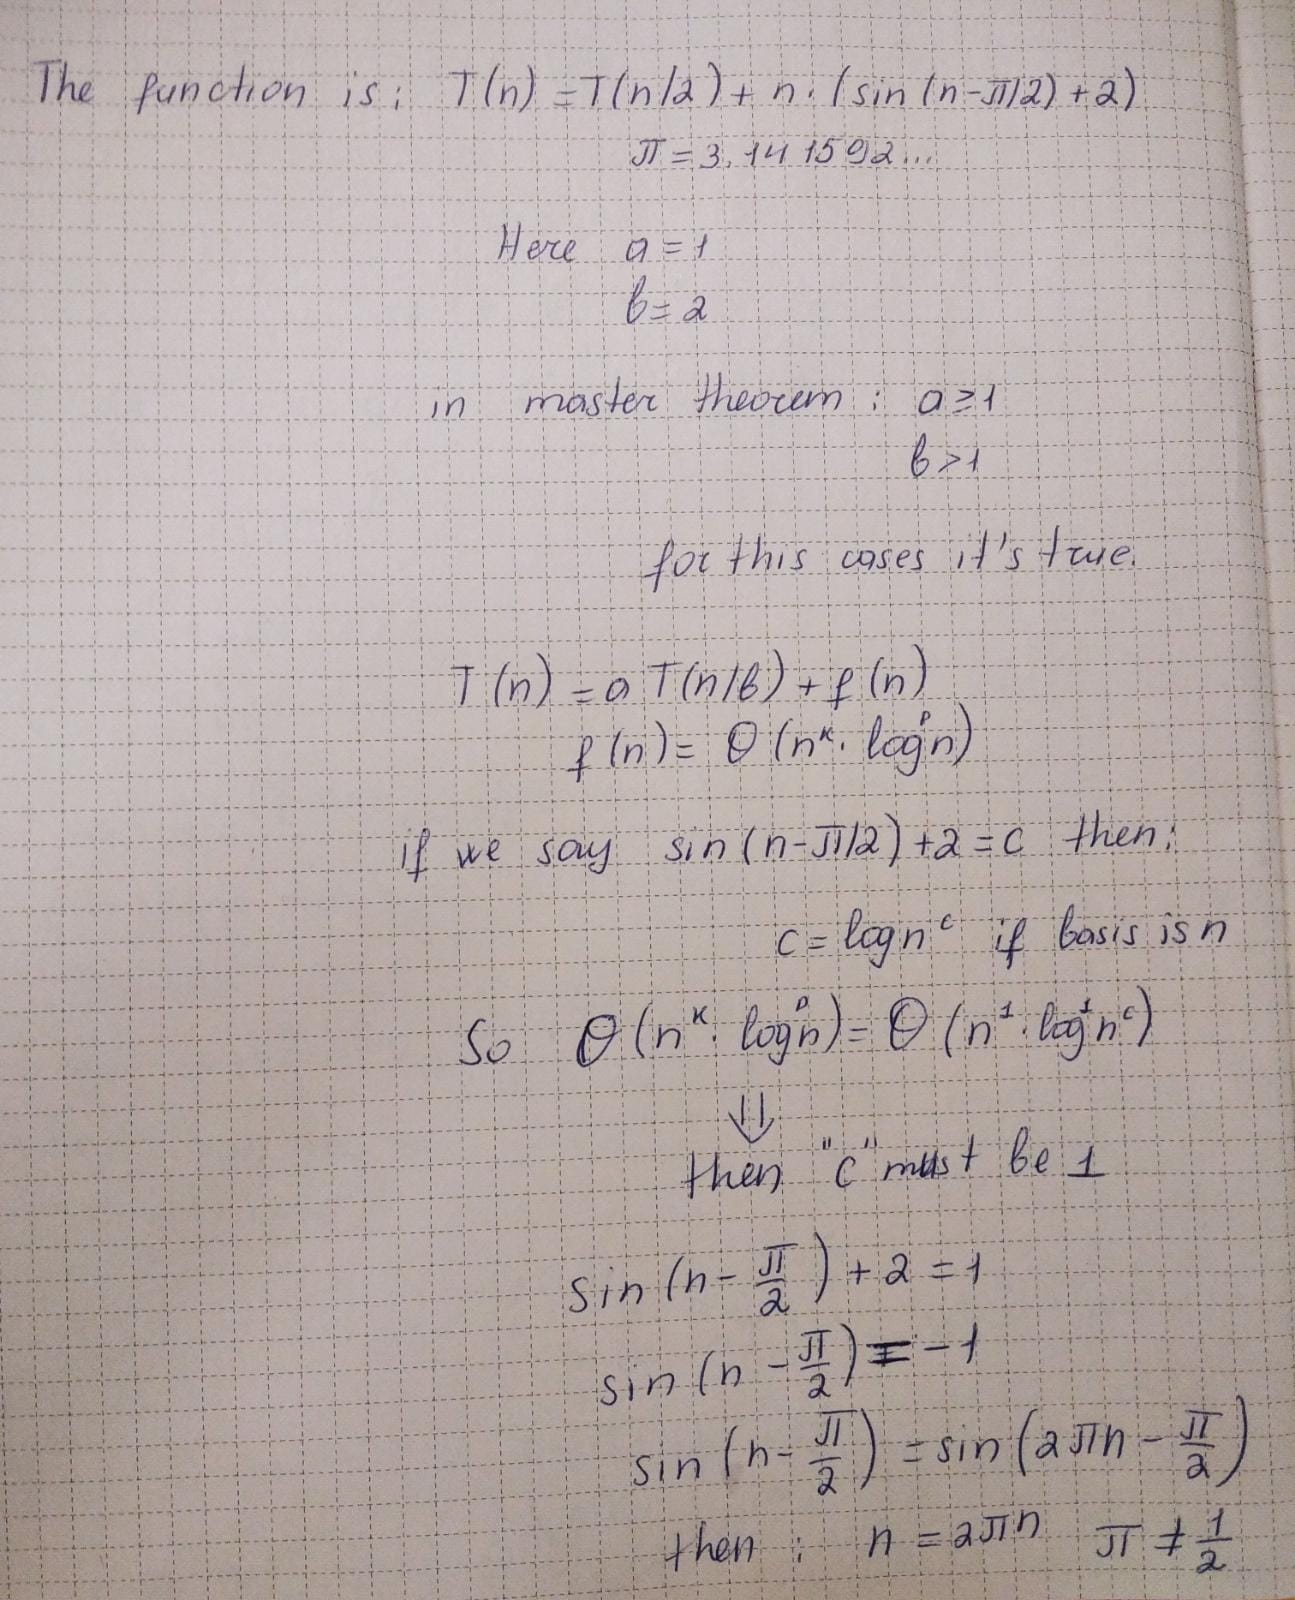
 
 So we can say that we can not apply this theorem to this function

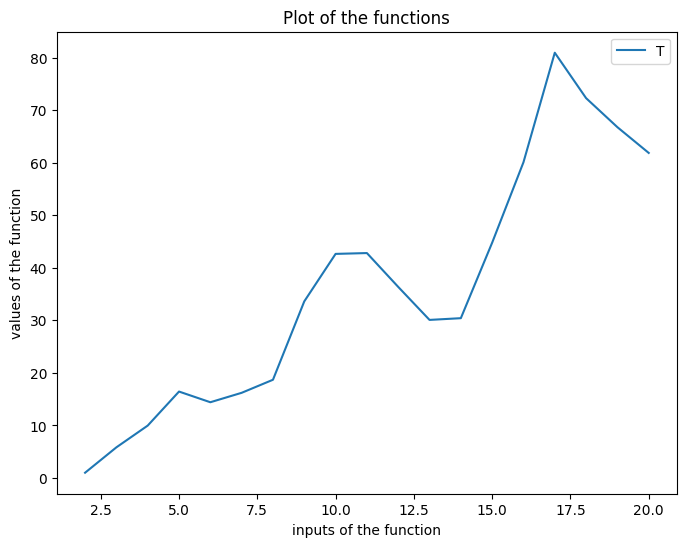

In [106]:
import matplotlib.pyplot as plt
import numpy as np
import math

N = [i for i in range(2, 21)]
T = [0, 1]

for i in N:
    T.append((T[(i//2)] + i * (np.sin(i - np.pi / 2) + 2)))
    
T.remove(0)
T.pop()

plt.figure(figsize=(8, 6), dpi=100)
plt.plot(N, T)
plt.xlabel('inputs of the function')
plt.ylabel("values of the function")
plt.legend("T(N) = 4 * T(T/2) + N")
plt.title("Plot of the functions")
plt.show()

**EX 3**

Implement and measure some linear-time sorting algorithm for 8, 32, and 64-bit unsigned (pseudo-)randomly generated integers (e.g. integers from [0,.. 2**32-1]), compare your implementation to the built-in sort times. Describe briefly the selected algorithm. Try to plot all 6 series of numbers (execution times for 8, 32 and 64-bit integers for both your and built-in sort) on one plot. Provide some constant factors by how much the speed differs roughly and comment on the result.

If you were not able to work with 64-bit unsigned integers, briefly describe why.

In order to generate unsigned integers I used this source https://www.adamsmith.haus/python/examples/5456/numpy-construct-an-8-bit-unsigned-intege, for random integers list I used this source https://pynative.com/python-random-randrange/, and for quicksort algorithm I used this source https://www.geeksforgeeks.org/python-program-for-quicksort/

In [107]:
#calculting time for the sort algorithm of the Python

#importing the libraries
import numpy as np
import time
import random

#random numbers list
nums  = random.sample(range(0, 2**16),2**16-1)

#8, 16, 32-bit unsigned integers lists
unsigned_8 = [np.uint8(i) for i in nums]
unsigned_32 = [np.uint32(i) for i in nums]
unsigned_64 = [np.uint64(i) for i in nums]

#calculating time for each bit

start = time.time()
unsigned_8.sort()
end = time.time()

start1 = time.time()
unsigned_32.sort()
end1 = time.time()

start2 = time.time()
unsigned_64.sort()
end2 = time.time()

#collecting each time to the list for plotting
time_lst = []
time_lst.append(end - start)
time_lst.append(end1 - start1)
time_lst.append(end1 - start1)

#printing the time for each bit
print(end - start)
print(end1 - start1)
print(end2 - start2)

0.015628576278686523
0.029057741165161133
0.015693187713623047


In [108]:
#calculting time for the quicksort algorithm

#importing the libraries
import numpy as np
import time
import random

def partition(l, r, nums):
    # Last element will be the pivot and the first element the pointer
    pivot, ptr = nums[r], l
    for i in range(l, r):
        if nums[i] <= pivot:
            # Swapping values smaller than the pivot to the front
            nums[i], nums[ptr] = nums[ptr], nums[i]
            ptr += 1
    # Finally swapping the last element with the pointer indexed number
    nums[ptr], nums[r] = nums[r], nums[ptr]
    return ptr

def quicksort(l, r, nums):
    if len(nums) == 1: # Terminating Condition for recursion. VERY IMPORTANT!
        return nums
    if l < r:
        pi = partition(l, r, nums)
        quicksort(l, pi-1, nums) # Recursively sorting the left values
        quicksort(pi+1, r, nums) # Recursively sorting the right values
    return nums


nums  = random.sample(range(0, 2**16),2**16-1)
unsigned_8 = [np.uint8(i) for i in nums]
unsigned_32 = [np.uint32(i) for i in nums]
unsigned_64 = [np.uint64(i) for i in nums]

start = time.time()
quicksort(0, len(unsigned_8)-1, unsigned_8)
end = time.time() 

start1 = time.time()
quicksort(0, len(unsigned_32)-1, unsigned_32)
end1 = time.time() 

start2 = time.time()
quicksort(0, len(unsigned_64)-1, unsigned_64)
end2 = time.time() 

time_lst1 = []
time_lst1.append(end - start)
time_lst1.append(end1 - start1)
time_lst1.append(end1 - start1)

print(end - start)
print(end1 - start1)
print(end2 - start2)

1.2748007774353027
0.17702794075012207
0.17198586463928223


Now it's time to plot

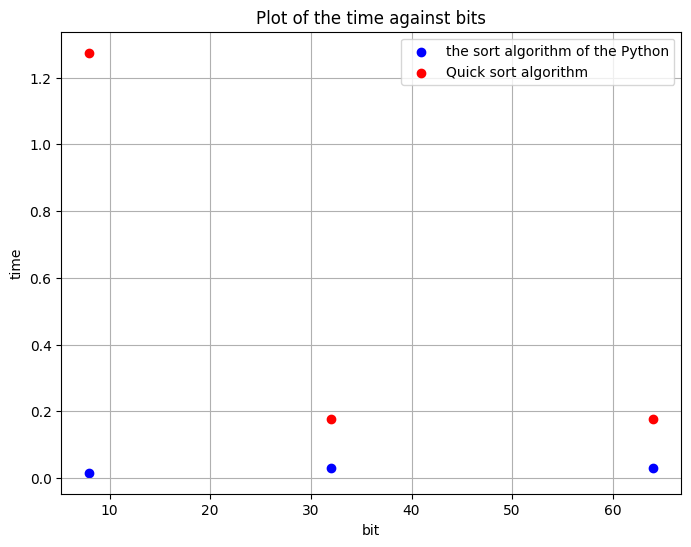

In [109]:
import matplotlib.pyplot as plt

bit_lst = [8, 32, 64]

plt.figure(figsize=(8, 6), dpi=100)
plt.scatter(bit_lst, time_lst, c ="blue")
plt.scatter(bit_lst, time_lst1, c ="red")
plt.grid(True)
plt.xlabel('bit')
plt.ylabel("time")
plt.title("Plot of the time against bits")
plt.legend(["the sort algorithm of the Python", "Quick sort algorithm"])
plt.show()

Python uses Timsort algorithm which is faster than quick sort in the avarage case.